<h1>Image Classification with TensorFlow<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Credit" data-toc-modified-id="Credit-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Credit</a></span></li><li><span><a href="#TensorFlow-basics" data-toc-modified-id="TensorFlow-basics-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>TensorFlow basics</a></span><ul class="toc-item"><li><span><a href="#Constants" data-toc-modified-id="Constants-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Constants</a></span></li><li><span><a href="#Simple-math" data-toc-modified-id="Simple-math-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Simple math</a></span></li><li><span><a href="#Flexible-arrays" data-toc-modified-id="Flexible-arrays-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Flexible arrays</a></span></li><li><span><a href="#CPU-vs.-GPU-(TBD)" data-toc-modified-id="CPU-vs.-GPU-(TBD)-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>CPU vs. GPU (TBD)</a></span></li></ul></li><li><span><a href="#Image-data-for-classification" data-toc-modified-id="Image-data-for-classification-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Image data for classification</a></span></li><li><span><a href="#Neural-network-for-classification" data-toc-modified-id="Neural-network-for-classification-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Neural network for classification</a></span><ul class="toc-item"><li><span><a href="#Params" data-toc-modified-id="Params-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Params</a></span></li><li><span><a href="#Input-Layer" data-toc-modified-id="Input-Layer-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Input Layer</a></span></li><li><span><a href="#Hidden-Layer(s)" data-toc-modified-id="Hidden-Layer(s)-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Hidden Layer(s)</a></span><ul class="toc-item"><li><span><a href="#Input-layer--&gt;-hidden-layer" data-toc-modified-id="Input-layer-->-hidden-layer-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Input layer -&gt; hidden layer</a></span></li><li><span><a href="#Hidden-layer--&gt;-output-layer" data-toc-modified-id="Hidden-layer-->-output-layer-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Hidden layer -&gt; output layer</a></span></li></ul></li><li><span><a href="#Output-Layer" data-toc-modified-id="Output-Layer-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Output Layer</a></span></li><li><span><a href="#Goal-Function" data-toc-modified-id="Goal-Function-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Goal Function</a></span></li><li><span><a href="#Optimizer" data-toc-modified-id="Optimizer-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Optimizer</a></span></li><li><span><a href="#More-KPI's" data-toc-modified-id="More-KPI's-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>More KPI's</a></span></li><li><span><a href="#Optimal-weight-calculation" data-toc-modified-id="Optimal-weight-calculation-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Optimal weight calculation</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>Results</a></span><ul class="toc-item"><li><span><a href="#Accuracy" data-toc-modified-id="Accuracy-4.9.1"><span class="toc-item-num">4.9.1&nbsp;&nbsp;</span>Accuracy</a></span></li><li><span><a href="#F1-Score" data-toc-modified-id="F1-Score-4.9.2"><span class="toc-item-num">4.9.2&nbsp;&nbsp;</span>F1 Score</a></span></li></ul></li></ul></li><li><span><a href="#Hyper-parameter-tuning" data-toc-modified-id="Hyper-parameter-tuning-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Hyper-parameter tuning</a></span><ul class="toc-item"><li><span><a href="#Number-of-epochs" data-toc-modified-id="Number-of-epochs-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Number of epochs</a></span></li><li><span><a href="#Learning-rate" data-toc-modified-id="Learning-rate-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Learning rate</a></span></li><li><span><a href="#Effect-of-initial-SD" data-toc-modified-id="Effect-of-initial-SD-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Effect of initial SD</a></span></li><li><span><a href="#Multivariate-hyper-parameter-tuning-(TBD)" data-toc-modified-id="Multivariate-hyper-parameter-tuning-(TBD)-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Multivariate hyper-parameter tuning (TBD)</a></span></li></ul></li></ul></div>

## Credit
Inspired by [this blog post](http://adventuresinmachinelearning.com/python-tensorflow-tutorial/), but adapted to more realistic problems: input as images (not pre-processed vectors), built in flexibility for hyper-parameter tuning, and structural flexibility (TBD)

## Setup

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

GPU setup

In [2]:
from mvnc import mvncapi as mvnc

## TensorFlow basics
Let's start by flexing our `tensorflow` muscles with some basic calculations

### Constants

In [2]:
a = tf.constant(3)
b = tf.constant(5)
result = tf.add(a,b)

In [3]:
with tf.Session() as sess:
    print(
        sess.run(fetches = [result, a, b])
    )

[8, 3, 5]


### Simple math

In [4]:
const = tf.constant(2.0, name = 'const')
b = tf.Variable(2.0, name = 'b')
c = tf.Variable(1.0, name = 'c')

In [5]:
# Operations
d = tf.add(b, c, name = 'd')
e = tf.add(c, const, name = 'e')
a = tf.multiply(d, e, name = 'a')

In [6]:
init_op = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init_op)
    print('Result is {}'.format(sess.run(a)))

Result is 9.0


### Flexible arrays

In [7]:
b = tf.placeholder(dtype = tf.float32, shape = [None, 1], name = 'b')

In [8]:
with tf.Session() as sess:
    sess.run(init_op)
    result = sess.run(a, feed_dict={b: np.arange(0,10)[:,np.newaxis]})
    
    print('Result is {}'.format(result))

Result is 9.0


### CPU vs. GPU (TBD)
TensorFlow can tell you if you're actually using your machine's GPU

In [9]:
a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
c = tf.matmul(a, b)

In [10]:
with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
    print(sess.run(c))

[[22. 28.]
 [49. 64.]]


## Image data for classification

We use the well researched [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) - A labeled collection of 28X28 pixel images of hand written digits and their labels. Thankfully `tensorflow` has the data pre-installed as part of the library so we can use a simple command to obtain the training & test sets

In [11]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Normalize pixel values to [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

In [12]:
print('Training set has', x_train.shape[0], 'images, and test set has', x_test.shape[0], 'images')

Training set has 60000 images, and test set has 10000 images


In [13]:
print('For example, image #5 in the training set is labeled \"', y_train[5], '\"')

For example, image #5 in the training set is labeled " 2 "


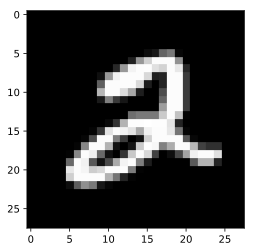

In [14]:
plt.imshow(
    x_train[5,:].reshape(28,28), 
    cmap = 'gray'
)

## Neural network for classification
for the sake of this exercise, we will build a very simple nnet with 1 hidden layer

### Params
We'll start by defining some fixed properties of the data that we don't expect to change (and therefore we can use python variables)

In [15]:
input_size = [28,28] # dimensions of input
output_size = 10 # number of categories for output
seed = 12345 # for consistent "random" initiation of weights / biases

Next come some hyper-parameters that we want to change later, and therefore we have to code them as TF placeholders. Different parameters require different structures (some require a default value for the definition of the graph structure, while others can be left "empty" for now)

In [16]:
# Number of neurons in the hidden layer
# hidden_layer_size = tf.placeholder_with_default(
#     [tf.constant(150, dtype=tf.int32)], 
#     shape = [1], 
#     name = 'init_stdev'
# ) 
hidden_layer_size = tf.constant(150, dtype = tf.int32, name = 'hidden_layer_size')
# SD for weight initiation
init_stdev = tf.placeholder_with_default(
    [tf.constant(0.03)], 
    shape = [1], 
    name = 'init_stdev'
) 
# Learning rate for optimiser
learning_rate = tf.placeholder(
    dtype = tf.float32, 
    name = 'learning_rate'
) 

### Input Layer
The images are for 28 x 28 pixels. We prepare a `placeholder` and flatten it so we can perform 2D matrix multiplication

In [17]:
x = tf.placeholder(tf.float32, [None, input_size[0], input_size[1]], name='x')
x_flat = tf.layers.Flatten()(x)

### Hidden Layer(s)
Here we define weights and biases for the connection between input layer, hidden layer and output later (this can be iterated for "deeper" networks"). As part of the definition we also assign initial values, "randomly" selected from a normal distribution with $\mu = 0$ and SD defined above, but with a pre-defined `seed` (so we maintain consistency later use this calculation graph for hyper-parameter tuning). 

#### Input layer -> hidden layer

In [18]:
tf.set_random_seed(seed)

W1 = tf.Variable(
    tf.random_normal(
        shape = [input_size[0] * input_size[1], hidden_layer_size], 
        stddev = init_stdev
    ),
    name = 'W1',
)
b1 = tf.Variable(
    tf.random_normal(
        shape = [hidden_layer_size],
        stddev = init_stdev
    ),
    name = 'b1'
)

And connect to the input layer

In [19]:
h1 = tf.add(tf.matmul(x_flat , W1), b1, name = 'h1')
h1 = tf.nn.relu(h1)

#### Hidden layer -> output layer

In [20]:
tf.set_random_seed(seed)

W2 = tf.Variable(
    tf.random_normal(
        [hidden_layer_size, output_size], 
        stddev = init_stdev
    ),
    name = 'W2'
)
b2 = tf.Variable(
    tf.random_normal(
        shape = [output_size],
        stddev = init_stdev
    ),
    name = 'b2'
)

And connect to the prev layer

In [21]:
h2 = tf.add(tf.matmul(h1, W2), b2, name = 'h2')

Finally we transform the outputs of the hidden layer into probabilities:

In [22]:
h2 = tf.nn.softmax(h2, name = 'h2')

### Output Layer

To avoid numerical issues we clip our predictions, and we collect some data for Tensoboard

In [23]:
y_clipped = tf.clip_by_value(h2, 1e-10, 0.9999999, name='y_clipped')
tf.summary.histogram('softmax', y_clipped)

<tf.Tensor 'softmax:0' shape=() dtype=string>

Since we classify our image into digits (0-9) we require 10 places in the layer the well be used to compare the output layer with the actual data. The data comes as labels so we transform it with a one-hot encoding to a Nx10 matrix

In [24]:
y = tf.placeholder(shape = [None], dtype = tf.int32, name='y')
y_mat = tf.one_hot(indices = y, depth = output_size, name = 'y_mat')

### Goal Function

The goal function we want to minimize is overall cross-entropy:

In [25]:
cross_entropy = tf.multiply(
    tf.constant(-1.0),
    tf.reduce_mean(
        tf.reduce_sum(
            y_mat * tf.log(y_clipped) + \
            (1 - y_mat) * tf.log(1 - y_clipped), 
            axis=1
        )
    ),
    name = 'cross_entropy'
)

### Optimizer
Here is where we pre-define the learning rate for gradient descent (we can later adjust this as part of hyper-parameter tuning)

In [26]:
optimiser = tf.train.\
    GradientDescentOptimizer(learning_rate=learning_rate).\
    minimize(cross_entropy)

### More KPI's 
So far we've defined the structure of the optimisation problem we want to solve. In order to evaluate the quality of our results we want to be able to extract some measures of the network's performance during & after the run. 

In [27]:
## Extract the predicted & actual values that were used
labels_pred = tf.argmax(y_clipped, axis = 1)
labels_actual = tf.argmax(y_mat, axis = 1)

## Some performance measures: confusion matrix, global accuracy and F1 score
conf_mat = tf.confusion_matrix(labels_actual, labels_pred)
accuracy = tf.reduce_sum(tf.diag_part(conf_mat))
f1 = tf.contrib.metrics.f1_score(labels_actual, labels_pred)

### Optimal weight calculation
A wrapper function to initialize variables and run our optimiser 

In [28]:
def nn_calc(
    x_train, 
    y_train, 
    x_test, 
    y_test, 
    sd = 0.03, # SD for weight initiation 
    lr = 0.5, # learninig rate for gradient descent
    epochs = 100, 
    verbose = True, 
    verbose_step = 10,
    xpu_logging = True,
    log_path = '/home/oberlods/logs/class/'
):
    '''This function takes x_train, y_traing, x_text, y_test and runs a gradiend descent for the numbber of epochs. 
    If verbose = True it will print interim cross-entropy every prind_mod lines. 
    '''
    
    assert x_train.shape[0] == y_train.shape[0]
    assert x_test.shape[0] == y_test.shape[0]
    assert x_train.shape[1] == x_test.shape[1]
    #assert y_train.shape[1] == y_test.shape[1]
    
    # initialisation operator
    init_op = tf.global_variables_initializer()
    
    with tf.Session() as sess:
        
        # initialise the variables
        sess.run(init_op, feed_dict = {init_stdev: [sd]}) 
        
        # Logging for TensorBoard
        train_writer = tf.summary.FileWriter(log_path, sess.graph)
        
        # Cycle through epochs
        for epoch in range(epochs):
            
            # Logging for TensorBoard
            merge = tf.summary.merge_all()
            
            _, c, summary = sess.run(
                [optimiser, cross_entropy, merge],
                feed_dict = {x: x_train, y: y_train, learning_rate: lr}
            )
            if verbose & ((epoch+1) % verbose_step == 0):
                print("Epoch:", (epoch + 1), "cost =", "{:.3f}".format(c))
            
            # Logging for TensorBoard
            train_writer.add_summary(summary, epoch+1)
            
        result = {
            'conf mat':  {
                'in' : sess.run(conf_mat, feed_dict={x: x_train, y: y_train}),
                'out': sess.run(conf_mat, feed_dict={x: x_test,  y: y_test})
            },
            'labels': {
                'actual': sess.run(labels_actual, feed_dict={x: x_train, y: y_train}),
                'predicted': sess.run(labels_pred, feed_dict={x: x_train, y: y_train})
            }         
        }
    return result

### Results
Using some default values we can run the calculation and analyse the results

In [29]:
nn_results = nn_calc(x_train, y_train, x_test, y_test)

Epoch: 10 cost = 2.161
Epoch: 20 cost = 1.360
Epoch: 30 cost = 0.875
Epoch: 40 cost = 0.821
Epoch: 50 cost = 0.702
Epoch: 60 cost = 0.605
Epoch: 70 cost = 0.557
Epoch: 80 cost = 0.520
Epoch: 90 cost = 0.507
Epoch: 100 cost = 0.521


#### Accuracy

In [30]:
def accuracy(conf_mat):
    return conf_mat.diagonal().sum()  / conf_mat.sum()

In [31]:
print(
    'In-sample accuracy of', accuracy(nn_results['conf mat']['in']),
    '/ out-of-sample accuracy of', accuracy(nn_results['conf mat']['out'])
)

In-sample accuracy of 0.9139166666666667 / out-of-sample accuracy of 0.9174


#### F1 Score

In [32]:
def f1_label(cm, i):
    '''Calculate F1 score for a specific label in a confusion matrix `cm`'''
    
    assert cm.shape[0] == cm.shape[1]
    assert i <= cm.shape[0]
    
    TP = cm[i,i]
    FP = cm[:,i].sum() - TP
    FN = cm[i,:].sum() - TP

    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    
    return 2 / (1 / precision + 1 / recall)

def f1(cm, average = 'weighted'):
    '''Calculcate F1 scores for all labels and average the results'''
    
    assert cm.shape[0] == cm.shape[1]
    
    f1s = [f1_label(cm, i) for i in range(cm.shape[0])]
    
    if average == 'weighted':
        weights = cm.sum(axis = 1) / cm.sum()
        
        return (f1s * weights).sum()
    else: 
        return None

In [33]:
print(
    'F1 score in-sample:', f1(nn_results['conf mat']['in']),
    'F1 score out-of-sample:', f1(nn_results['conf mat']['out'])
)

F1 score in-sample: 0.9138483241661899 F1 score out-of-sample: 0.9174140595350241


Just checking the calculcation :)

In [34]:
from sklearn.metrics import f1_score
print(
    'F1 score in-sample (by SKLearn)', 
    f1_score(
        y_true = nn_results['labels']['actual'], 
        y_pred = nn_results['labels']['predicted'], average='weighted'
    )
)

F1 score in-sample (by SKLearn) 0.9138483241661898


## Hyper-parameter tuning

We have several hyper-parameters we can investigate:
* Epochs
* Learning rate
* SD of initial weights
* Size of the hidden layer (TBD)

We'll try simple one-dimensional grid search for these parameters and visualise the results

In [35]:
def plot_result(x, y, xlabel, ylabel = 'Out-of-sample F1 Score (weighted)'):
    plt.plot(x,y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

### Number of epochs

In [36]:
epoch_range = np.array([20,50,100,250,500,1000])
epoch_impact = [f1(nn_calc(x_train, y_train, x_test, y_test, epochs = i, verbose = False)['conf mat']['out']) for i in epoch_range]

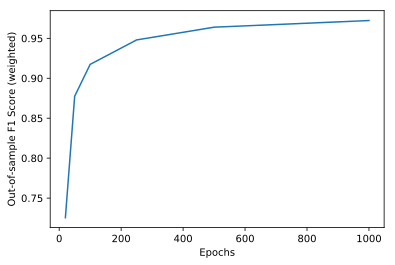

In [38]:
plot_result(epoch_range, epoch_impact, 'Epochs')

* Conclusion: accuracy keeps improving with the number of epochs, but we see a diminishing rate of return (the decision on the final value should balance accuracy and cost of calculation time)

### Learning rate

In [39]:
## Wrapper to change optimiser learning rates 
def f1_by_learn_rate(lr, verbose = False):
    '''Takes a learning rate and applies it to a pre-built network by only modifying the `optimiser` component.
    Returns the out-of-sample confusion matrix'''
    
    assert 0 <= lr <= 1
    
    if verbose:
        print('lr =', lr)
    
    return f1(nn_calc(x_train, y_train, x_test, y_test, verbose = verbose, lr = lr)['conf mat']['out'])

In [43]:
lr_range = np.arange(0.1, 0.9, 0.1)
lr_impact = [f1_by_learn_rate(lr) for lr in lr_range]

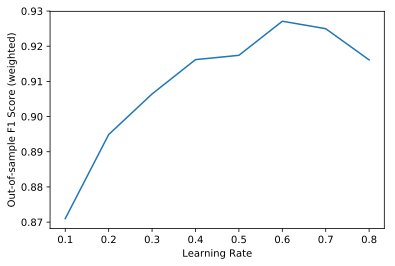

In [44]:
plot_result(lr_range, lr_impact, 'Learning Rate')

* Conclusion: in the current setup we should probably increase the learning rate to around 0.6

### Effect of initial SD

We initiated the weights & biases with randomly sampled values from a normal distribution $N(0, \sigma^2)$. What would happen if we change the value of $\sigma$?

In [45]:
## Wrapper 
def f1_by_sd(sd, verbose = False):
    '''Takes a $\sigma$ and uses it to initialize weights and biases.
    Returns the out-of-sample confusion matrix'''
    
    assert sd > 0
    
    if verbose:
        print('$\sigma$ =', sd)
    
    return f1(nn_calc(x_train, y_train, x_test, y_test, verbose = verbose, sd = sd)['conf mat']['out'])

In [61]:
sd_range = [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.12, 0.15]
sd_impact = [f1_by_sd(sd) for sd in sd_range]

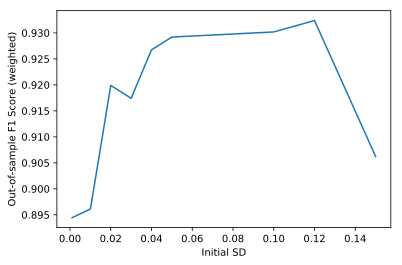

In [63]:
plot_result(sd_range, sd_impact, 'Initial SD')

* Not a clear conclusion here, although it seems that values between 0.05 and 0.12 have better performance

### Multivariate hyper-parameter tuning (TBD)
Naturally, if we consider all parameters simultaneously we may find a better optimal setup. On the other hand the number of possible combination is huge, making a "full" grid search irrelevantly long. 
* TBD: implement some search algorithms (e.g. Bayesian optimisation)